In [47]:
library(R2DAG)
library(ConnectednessApproach)
library(vars)
library(tictoc)
library(pcalg)
library(ggplot2)

## Contamporaneous-only effects

In [2]:
A0 <- matrix(c(1, 0, 0, 0,
                0, 1, 0, 0, 
                -0.5, -0.5, 1, 0,
                -0.5, 0, -0.5, 1), nrow = 4, byrow = TRUE)

data <- gen_svar(1000, A0=A0, list_A=list(), df=10)
var_model <- VAR(data, p = 1, type = "const", season = NULL, exog = NULL)

In [3]:
cc <- irf_network(var_model, n.ahead=5)
cc

,Y1,Y2,Y3,Y4
Y1,0.37742052,0.002598722,0.01661722,0.01155946
Y2,0.02706322,0.375419581,0.01199397,0.01126378
Y3,0.22276027,0.191898131,0.37345678,0.00260037
Y4,0.30953219,0.116166270,0.19779945,0.37650209
,Y1,Y2,Y3,Y4
Y1,1.0000000,0.0000000,0.0000000,0
Y2,0.0106937,1.0000000,0.0000000,0
Y3,0.5213459,0.5092566,1.0000000,0
Y4,0.7609667,0.2667626,0.4880943,1
,Y1,Y2,Y3,Y4


In [4]:
B_hat <- Bcoef(var_model)
Sigma_hat = cov(resid(var_model))
fevd = FEVD(Phi=B_hat, Sigma=Sigma_hat, nfore=5, type="time", generalized=TRUE)$FEVD
dca = ConnectednessTable(fevd)
dca

68.1312147,0.009932965,12.03279,19.826066
0.2750563,80.901756213,15.18915,3.634039
10.5113403,10.828378810,58.50152,20.158760
17.4097252,2.493259835,20.60340,59.493611
100.0000000,0.3817213,30.22470,45.17245
0.3817213,100.0000000,31.45617,8.36362
30.2246958,31.4561727,100.00000,51.35155
45.1724518,8.3636197,51.35155,100.00000
0.0000000,-0.2651233,1.5214459,2.4163410
0.2651233,0.0000000,4.3607693,1.1407796
-1.5214459,-4.3607693,0.0000000,-0.4446441


## Lagged-only effects

In [5]:
A1 <- matrix(c(0.5, 0,   0,   0,
               0.7, 0.5, 0,   0,
               0,   0.7, 0.5, 0,
               0,   0.2, 0, 0.5), nrow = 4, byrow = TRUE)

I <- matrix(c(1, 0, 0, 0,
              0, 1, 0, 0,
              0, 0, 1, 0,
              0, 0, 0, 1), nrow = 4, byrow = TRUE)

data <- gen_svar(1000, A0=I, list_A=list(A1), df=10)
var_model <- VAR(data, p = 1, type = "const", season = NULL, exog = NULL)

In [6]:
cc <- irf_network(var_model, n.ahead=5)
cc

,Y1,Y2,Y3,Y4
Y1,0.25741453,0.009605857,0.007250618,0.02924788
Y2,0.34773860,0.257581267,0.006484952,0.04389585
Y3,0.37314756,0.320418889,0.249869738,0.05656382
Y4,0.08073364,0.071714355,0.010220882,0.26626701
,Y1,Y2,Y3,Y4
Y1,1.000000000,0.00000000,0,0.000000000
Y2,0.053603840,1.00000000,0,0.005941277
Y3,0.009588008,0.01216972,1,0.082070557
Y4,0.007920583,0.00000000,0,1.000000000
,Y1,Y2,Y3,Y4


In [7]:
B_hat <- Bcoef(var_model)
Sigma_hat = cov(resid(var_model))
fevd = FEVD(Phi=B_hat, Sigma=Sigma_hat, nfore=5, type="time", generalized=TRUE)$FEVD
dca = ConnectednessTable(fevd)
dca

98.814947,0.2551014,0.01790979,0.9120416
50.462672,48.7321290,0.04384947,0.7613492
35.553778,34.3126706,29.41995810,0.7135934
4.480706,4.4774152,0.49097785,90.5509012
100.000000,51.161639,43.431326,5.537879
51.161639,100.000000,61.073585,7.249792
43.431326,61.073585,100.000000,1.988144
5.537879,7.249792,1.988144,100.000000
0.000000,-50.207571,-35.5358682,-3.5686642
50.207571,0.000000,-34.2688211,-3.7160660
35.535868,34.268821,0.0000000,0.2226155


## Lagged and contamporenaous effects as well

In [8]:
A1 <- matrix(c(0.5, 0,   0,   0,
               0.7, 0.5, 0,   0,
               0,   0.7, 0.5, 0,
               0,   0.2, 0, 0.5), nrow = 4, byrow = TRUE)

A0 <- matrix(c(1, 0, 0, 0,
                0, 1, 0, 0, 
                -0.5, -0.5, 1, 0,
                -0.5, 0, -0.5, 1), nrow = 4, byrow = TRUE)

data <- gen_svar(1000, A0=A0, list_A=list(A1), df=10)
var_model <- VAR(data, p = 1, type = "const", season = NULL, exog = NULL)

In [9]:
cc <- irf_network(var_model, n.ahead=5)
cc

,Y1,Y2,Y3,Y4
Y1,0.1220961,0.001814307,0.0009802436,0.003486923
Y2,0.1604635,0.114717484,0.0428955923,0.002631227
Y3,0.4082535,0.198503316,0.1851744772,0.003599079
Y4,0.4879451,0.208245733,0.1890431296,0.114766075
,Y1,Y2,Y3,Y4
Y1,1.000000000,0.000000000,0.0000000,0
Y2,0.009400142,1.000000000,0.3843716,0
Y3,0.479080629,0.000000000,1.0000000,0
Y4,0.718973569,0.007483281,0.5543281,1
,Y1,Y2,Y3,Y4


In [10]:
B_hat <- Bcoef(var_model)
Sigma_hat = cov(resid(var_model))
fevd = FEVD(Phi=B_hat, Sigma=Sigma_hat, nfore=5, type="time", generalized=TRUE)$FEVD
dca = ConnectednessTable(fevd)
dca

70.15817,0.007114238,10.90621,18.92851
38.62074,31.871282900,15.52362,13.98436
36.37953,16.666823109,27.92423,19.02942
35.73943,12.056315727,23.55982,28.64443
100.00000,54.92478,65.05654,71.24226
54.92478,100.00000,69.98990,60.17043
65.05654,69.98990,100.00000,85.90186
71.24226,60.17043,85.90186,100.00000
0.00000,-38.613627,-25.473328,-16.810919
38.61363,0.000000,-1.143207,1.928044
25.47333,1.143207,0.000000,-4.530407


## Empirical analysis

In [11]:
var_model <- VAR(dy2012, p = 1, type = "const", season = NULL, exog = NULL)
summary(var_model)


VAR Estimation Results:
Endogenous variables: SP500, R_10Y, DJUBSCOM, USDX 
Deterministic variables: const 
Sample size: 2770 
Log Likelihood: -15922.815 
Roots of the characteristic polynomial:
0.6007 0.5774 0.2477 0.1385
Call:
VAR(y = dy2012, p = 1, type = "const", exogen = NULL)


Estimation results for equation SP500: 
SP500 = SP500.l1 + R_10Y.l1 + DJUBSCOM.l1 + USDX.l1 + const 

            Estimate Std. Error t value Pr(>|t|)    
SP500.l1     0.55142    0.01718  32.089  < 2e-16 ***
R_10Y.l1     0.04614    0.01777   2.597  0.00946 ** 
DJUBSCOM.l1 -0.03576    0.01233  -2.900  0.00376 ** 
USDX.l1      0.05208    0.02054   2.535  0.01130 *  
const       -3.72666    0.24710 -15.081  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 0.9616 on 2765 degrees of freedom
Multiple R-Squared: 0.3433,	Adjusted R-squared: 0.3424 
F-statistic: 361.4 on 4 and 2765 DF,  p-value: < 2.2e-16 


Estimation results for equation R_10Y: 
R_10Y = SP

In [13]:
tic()
boo <- bootstrap_lingam(dy2012, 1000)
toc()

Warning message in zoo(rval, index(x)[i]):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"
Warning message in zoo(rval, index(x)[i]):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"
Warning message in zoo(rval, index(x)[i]):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"
Warning message in zoo(rval, index(x)[i]):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"
Warning message in zoo(rval, index(x)[i]):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"
Warning message in zoo(rval, index(x)[i]):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"
Warning message in zoo(rval, index(x)[i]):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"
Warning message in zoo(rval, index

113.44 sec elapsed


In [29]:
lista <- boo$matrices[1:24]
names(lista) <- boo$frequencies
lista[1:3]

0,0,0,1
1,0,0,1
0,0,0,0
0,0,0,0
0,0,0,0
1,0,0,1
0,0,0,0
0,0,0,0
0,0,0,0
1,0,0,1
0,0,0,0


In [30]:
cc <- irf_network(var_model, n.ahead=5)
cc

,SP500,R_10Y,DJUBSCOM,USDX
SP500,0.60363524,0.03470050,0.01800086,0.17419671
R_10Y,0.24415554,0.44399043,0.12073383,0.19112020
DJUBSCOM,0.03870930,0.14900710,0.52261417,0.09642788
USDX,0.09440186,0.03611869,0.07355856,0.37403454
,SP500,R_10Y,DJUBSCOM,USDX
SP500,1.0000000,0,0.03053445,0.2168331
R_10Y,0.2689069,1,0.07720951,0.2982142
DJUBSCOM,0.0000000,0,1.00000000,0.0000000
USDX,0.0000000,0,0.06917344,1.0000000
,SP500,R_10Y,DJUBSCOM,USDX


In [31]:
B_hat <- Bcoef(var_model)
Sigma_hat = cov(resid(var_model))
fevd = FEVD(Phi=B_hat, Sigma=Sigma_hat, nfore=5, type="time", generalized=TRUE)$FEVD
dca = ConnectednessTable(fevd)
dca

85.1076878,9.571902,0.1359337,5.184477
12.7403256,75.511036,4.3943907,7.354247
0.1438235,5.520927,91.2603856,3.074864
7.5910474,8.245501,2.7955792,81.367872
100.00000,24.39415,0.316740,14.254334
24.39415,100.00000,11.223613,18.088903
0.31674,11.22361,100.000000,6.577575
14.25433,18.08890,6.577575,100.000000
0.000000000,-3.1684239,-0.007889813,-2.4065707
3.168423850,0.0000000,-1.126536244,-0.8912537
0.007889813,1.1265362,0.000000000,0.2792848


### Rolling network

In [34]:
dy <- readRDS("dy_tci.rds")
irf <- readRDS("irf_tci.rds")
irf3 <- readRDS("irf3_tci.rds")
irf7 <- readRDS("irf7_tci.rds")

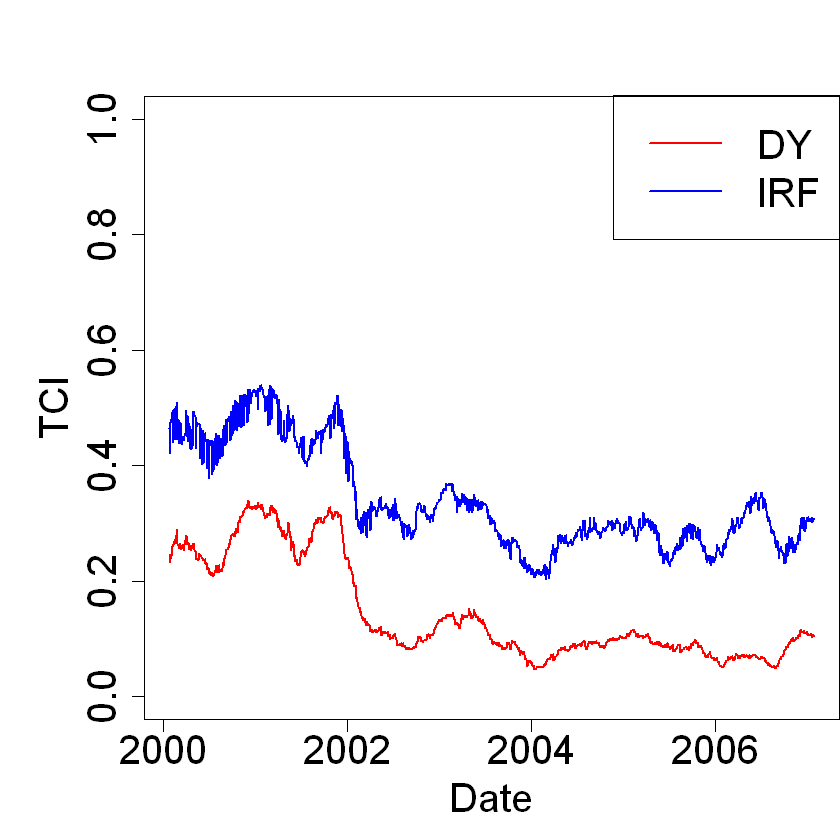

In [40]:
# Set larger margins: bottom, left, top, right
par(mar = c(5, 6, 4, 0))  # default is c(5, 4, 4, 2)

# Extract date index
date_index <- as.Date(rownames(as.data.frame(dy2012))[253:2016])

# Plot
plot(
  x = date_index,
  y = dy/100,
  type = "l",
  col = "red",
  lwd = 2,
  ylim = c(0, 1),
  xlab = "Date",
  ylab = "TCI",
  main = "",
  cex.axis = 2,
  cex.lab = 2,
  cex.main = 2
)

lines(date_index, irf, col = "blue", lwd = 2)

legend("topright",
       legend = c("DY", "IRF"),
       col = c("red", "blue"),
       lwd = 2,
       cex = 2)


#### Robustness

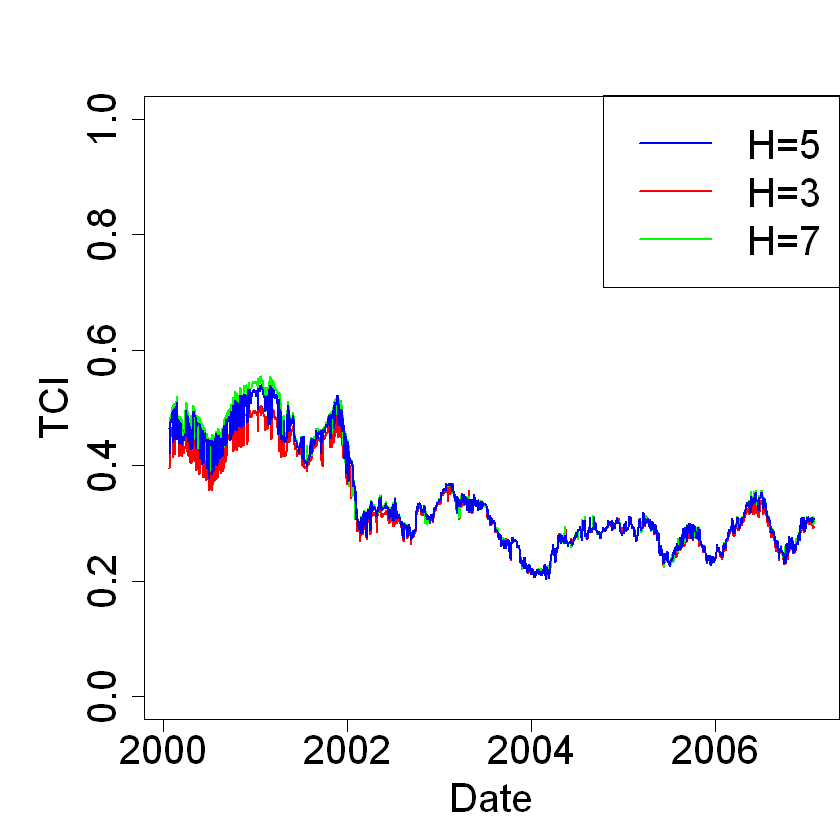

In [41]:
# Set larger margins: bottom, left, top, right
par(mar = c(5, 6, 4, 0))  # default is c(5, 4, 4, 2)

# Extract date index
date_index <- as.Date(rownames(as.data.frame(dy2012))[253:2016])

# Plot
plot(
  x = date_index,
  y = irf3,
  type = "l",
  col = "red",
  lwd = 2,
  ylim = c(0, 1),
  xlab = "Date",
  ylab = "TCI",
  main = "",
  cex.axis = 2,
  cex.lab = 2,
  cex.main = 2
)

lines(date_index, irf7, col = "green", lwd = 2)
lines(date_index, irf, col = "blue", lwd = 2)

legend("topright",
       legend = c("H=5", "H=3", "H=7"),
       col = c("blue", "red", "green"),
       lwd = 2,
       cex = 2)

In [50]:
mean(irf3)
mean(irf)
mean(irf7)

[1] 0.3403797

[1] 0.3313318

[1] 0.3430644

## Appendix

In [43]:
mat <- matrix(c(0, 0, 0, 0,
                 0, 0, 0, 0, 
                 1, 1, 0, 0,
                 1, 0, 1, 0), nrow = 4, byrow = TRUE)

In [48]:
results <- expand.grid(n = c(100, 250, 500, 1000),
                       df = c(5, 10, 15, 20))
results$success_rate <- NA
tic()

for (row in 1:nrow(results)) {
  n <- results$n[row]
  df <- results$df[row]
  success_count <- 0
  
  for (i in 1:1000) {
    sample_data <- gen_svar(n, A0=A0, list_A=list(), df=df)
    amat_result <- data2amat(sample_data)$amat
    
    if (identical(amat_result, mat)) {
      success_count <- success_count + 1
    }
  }
  
  results$success_rate[row] <- success_count / 1000
}
toc()

1238.72 sec elapsed


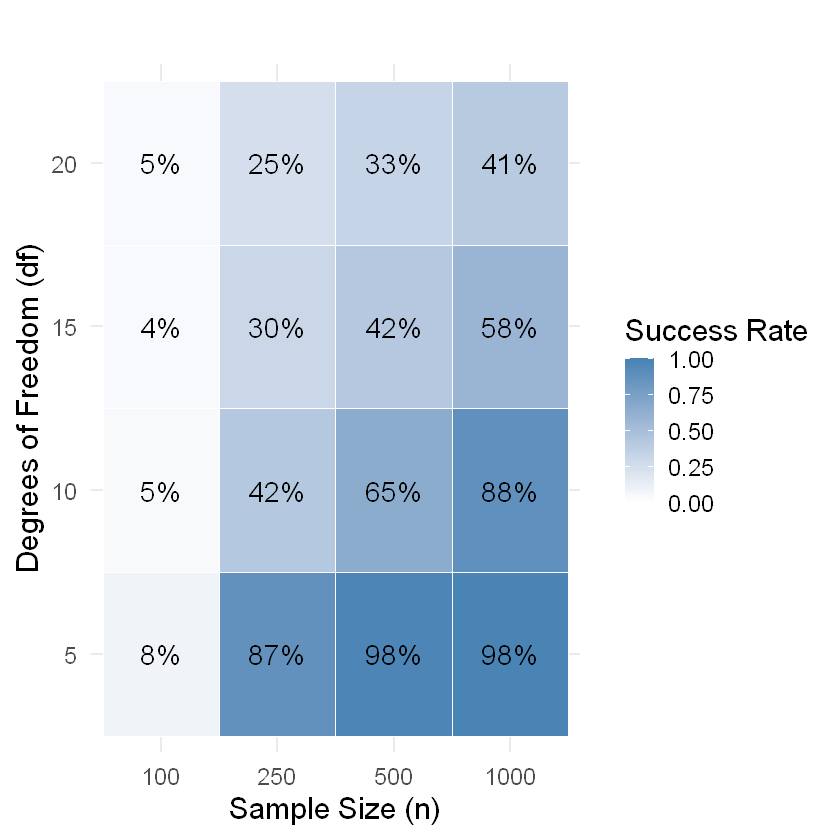

In [49]:
ggplot(results, aes(x = factor(n), y = factor(df), fill = success_rate)) +
  geom_tile(color = "white") +
  geom_text(aes(label = paste0(round(success_rate * 100), "%")), color = "black", size = 6) +  # szövegméret duplázása
  scale_fill_gradient(low = "white", high = "steelblue", limits = c(0,1)) +
  labs(x = "Sample Size (n)",
       y = "Degrees of Freedom (df)",
       fill = "Success Rate",
       title = "") +
  theme_minimal(base_size = 18)  # minden alapméret kétszerezve